### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2017 ###

# Optimally Uniform Magnetic Fields Using Discrete Circular Electromagnetic Coils #

#### Patrick Forbes (pforbes@wisc.edu), Alex Haufler (haufler@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
    1. [On Axis Fields](#2.A.-On-Axis-Fields)
    1. [Fields in a Volume](#2.B.-Fields-in-a-Volume)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)
1. [References](#6.-References)

## 1. Introduction ##

This report introduces a method to produce optimally uniform magnetic fields in a space by determining the position, size, and current of N discrete circular electromagnet coils placed along a shared axis.  A highly uniform magnetic field is particularly useful for medical applications including MRI, amplifiers in RADAR applications for signal transmission and reception, and for studying magnetic fields in tissues and cells. 
 
One of the applications of uniform magnetic fields that our group is interested in is high power microwave (HPM) amplifiers. HPM amplifiers are used in high-power RADAR transmissions such as electronic warfare for disrupting other communication systems. HPM amplifiers typically produce amplification by exploiting the interaction of an electron beam with a magnetic field and some additional circuitry.  At the input of the device, a small RF signal is used to induce velocity modulation on electrons in the beam, causing some to travel faster than others.  As the higher velocity electrons travel along the device, they catch up to slower electrons and bunches form.  The high and low density bunches form in proportion to the small RF input, and a much larger RF signal can be extracted at the output. The magnetic field is necessary in confining the electrons within a beam, otherwise the electrons would not travel from the input to the output of the device, and therefore no amplification would take place. It is important to have a uniform magnetic field because spatially varying magnetic fields could change beam radius size which changes how the beam interacts with the device circuitry. While ensuring consistent and expected operation, a uniform magnetic field also allows the electron beam to be confined using less total power, improving device efficiency.

The report considers two approaches to achieving highly uniform magnetic fields.  The first is to only consider magnetic fields along the axis of the electromagnetic coils, using a closed form expression for the total magnetic field along the axis.  The second is a more general approach that considers the total fields evaluated at arbitrary points within the interior volume of the coils using a series-expansion approximation. The second approach is aimed at explicitly minimizing variation of the magnetic fields within a sampled volume that could correspond roughly to the size of a human body, such as would be desired in an MRI application. These approaches are first considered separately, then validated against one another. The more general method of sampling the fields within a volume along the axis of the coils should be similar to the purely axial approach when the volume-sampling is only axial.    


## 2. Mathematical model ##

This project is set up in two main problems. The first only considers the magnetic field along the axis of the coils.  The second is a more general problem which considers the magnetic field in an entire volume.  It is shown that the second problem can be reduced to the first if only considering fields along the axis.  First the theory for on axis fields is developed followed by a more general theory for the field in a volume.

### 2.A. On Axis Fields ###

The magnetic field on axis due to a single coil is given by the Biot Savart Law as 

$$
B(z) = \frac{\mu_0 I a^2}{(a^2 + (d - z)^2)^{3/2}}
$$

where B is the magnetic field $B = \mu_0 H$, $mu_0$ is the permeability of free space, $a$ is the coil radius, $d$ is the coil poisition along the z axis, and z is the position along the axis where the field is being sampled.  The total field from multiple coils placed at ... positions is 

$$
B_{total}(z) = \sum_{n = 1}^N {\frac{\mu_0 I_n a_n^2}{(a_n^2 + (d_n - z)^2)^{3/2}}}
$$

We would like to make the field uniform over a length $L$ and can only allow the magnets to be placed at a distance $L_{max}$, which can be either larger or smaller than L. We assume that electromagnet coil currents, positions, and radii will be symmetrical around the center which allows the number of variables and calculations to be reduced to half, or $N/2$.  

Finally, to minimize variations in magnetic field strength over the region, we minimize the difference in field strength at sampled z points along the axis from the field strength at the center, or 

$$
 \underset{\{z, a, I\} \in \mathbb{R^n}}{\text{minimize}} \space \sum_z{\|B_{total}(z) - B_{ceneter}\|}
$$

where

$$
B_{center} = B_{total}(z=0)
$$

The above formulation yields the following nonlinear, nonconvex optimization model:

$$
\begin{aligned}
\underset{\{z, a, I\} \in \mathbb{R^n}}{\text{minimize}}\qquad& \sum_z{\|B_{total}(z) - B_{center}\|^2}\\
\text{subject to:}\qquad& z_n \le maxSpacing && n=1,\dots,N\\
& I_n \le maxCurrent && n=1,\dots,N\\
& a_n \le maxRadius && n=1,\dots,N\\
& I_1 \le 1\\
& I_1 \ge 1\\
\end{aligned}
$$




### 2.B. Fields in a Volume ###

The magnetic field of a single coil on a plane is given by elliptic integrals of ...

A discussion of the modeling assumptions made in the problem (e.g. is it from physics? economics? something else?). Explain the decision variables, the constraints, and the objective function. Finally, show the optimization problem written in standard form. Discuss the model type (LP, QP, MIP, etc.). Equations should be formatted in $\LaTeX$ within the IJulia notebook. For this section you may **assume the reader is familiar with the material covered in class**.

As shown in [1], the magnetic fields from a coil, inculding fields off axis, can be calcuated as follows.  First the vector magnetic potential, $A$, of a coil is given by   

$$
A(r, \theta, z) = \frac{a \mu I}{2 \pi}\int^{\pi}_{0} \frac{cos \phi d \phi}{\sqrt{a^2 + r^2 + z^2 - 2 a r cos \phi}}\\
$$

where $a$ is the coil radius, $r$ is the radial distance from the coil axis, $z$ is the position along the axis, and $\phi$ is the angle the radial vector makes with respect to the x-axis in polar coordinates.  The vector magntic potential can be written in terms of complete elliptic integral functions as  

$$
A(r, \theta, z) = \frac{a \mu I}{k \pi} \frac{\sqrt{a}}{r} \left[\left( 1 - \frac{k^2}{2} \right)K(k^2)- K(k^2) \right]
$$

where $K$ is the complete elliptic integral of the first kind, $E$ is the the complete elliptic integral of the second kind, and $k^2$ is a parameter that depends on the coil radius, coil current, and position with respect to the coil.  While $K$ and $E$ cannot be easily evaluated numerically, both $K$ and $E$ can be approximated with either series expansions in the parameter $k^2$, or by simple functions with tuned parameters. Later, we evaluate the accuracy of two competing approximations to decide which is best suited for our problem: The first one is given by Frisch-Fay (1963) as

$$
K(k^2) = \frac{\pi}{2} \frac{1}{{(1 - 0.97 k^2)}^{(1/4)}} \\
E(k^2) = \frac{\pi}{2} \frac{1}{{(1 + 1.36 k^2)}^{(1/4)}} 
$$

The second approximation to the elliptic integrals is given by a series expansion derived by Byrd and Friedman (1971):

$$
K(k^2) = \frac{\pi}{2} \sum_{n=0}^{\infty} {\frac{(2n-1)!!}{2^n n!}}^{2} k^n \\
E(k^2) = \frac{\pi}{2} \sum_{n=0}^{\infty} {\frac{(2n-1)!!}{2^n n!}}^{2} \frac{k^n}{2n-1} 
$$

For an arbitrarily accurate approximation, more terms in the expansion can be kept. Here, we also assume that the magnetic field is constant when compared to $\theta$ so we only need to consider points on a single plane. This is a valid assumption because the entire system is rotationally symmetric with respect to the coil axis, and therefore the fields will also be rotationally symmetric. After calculating $A$, the magnetic field, $B$, can be found from the curl of $A$,

$$
 B = \nabla \times A
$$

The above equations result in $B$ vectors

$$
B_{\theta} = 0 \\
B_{r} =  \frac{\mu I}{2 \pi} \frac{1}{\sqrt{(a + r)^2 + z^2}} \left[ -K + \frac{a^2 + r^2 + z^2}{(a-r)^2 + z^2} E \right]\\
B_{z} =  \frac{\mu I}{2 \pi} \frac{1}{\sqrt{(a + r)^2 + z^2}} \left[ K + \frac{a^2 - r^2 - z^2}{(a-r)^2 + z^2} E  \right]
$$

The above equations give a forumation for the magnetic field at point $(r,z)$ due to a coil with radius $a$.  The field at a point due to multiple coils is simply the superposition of fields from coils given by 

$$
B_{r,total} = \sum_{n = 1}^N{ \frac{\mu I_n}{2 \pi} \frac{1}{\sqrt{(a_n + r)^2 + (z - z_n)^2}} \left[ -K + \frac{a_n^2 + r^2 + (z - z_n)^2}{(a_n-r)^2 + (z - z_n)^2} E \right]}
$$

$$
B_{z,total} = \sum_{n = 1}^N{ \frac{\mu I_n}{2 \pi} \frac{1}{\sqrt{(a_n + r)^2 + (z - z_n)^2}} \left[ K + \frac{a_n^2 - r^2 - (z - z_n)^2}{(a_n-r)^2 + (z - z_n)^2} E \right]}
$$

Since we want make the field intensity uniform in a certain specified volume, we pick choose to minimize the normed difference between the field intensity at any point and the field intensity at the center point, i.e.,

$$
\begin{aligned}
\underset{\{z, a, I\} \in \mathbb{R^n}}{\text{minimize}}\qquad& \sum_z \sum_r{\|B_{tot}(r,z) - B_{center}\|^2}\\
\text{subject to:}\qquad& z_n \le maxSpacing && n=1,\dots,N\\
& I_n \le maxCurrent && n=1,\dots,N\\
& a_n \le maxRadius && n=1,\dots,N\\
\end{aligned}
$$


## 3. Solution ##



### 3.A. On Axis Field Solutions ###

In [1]:
using JuMP,NLopt
mu0 = 4*π*1e-7
N = 4  # Number of coils
L = 2 # length to maximize flatness over
numSamples = 100;
z = linspace(L/2,0,numSamples)
Lmax = 3;  # total legth which magnets can be placed over
POWER = 2;   # The power to use to reduce errors

using JuMP,NLopt
m = Model(solver = NLoptSolver(algorithm=:LD_MMA))
@variable(m, I[i in 1:Int(N/2)], start = 1)        # Coil Current
@variable(m, d[i in 1:Int(N/2)], start = i*2/N)    # Coil position
@variable(m, a[i in 1:Int(N/2)], start = 0.8)      # Coil radius
@constraint(m, constra1[i in 1:Int(N/2)], a[i] >= 0.75)  # constrain min radius
@constraint(m, constra2[i in 1:Int(N/2)], a[i] <= 0.9)   # constrain max radius
@constraint(m, constrI1[i in 1], I[i] <= 1)              # set current of coil 1
@constraint(m, constrI2[i in 1], I[i] >= 1)
@constraint(m,constr1[i in 1:Int(N/2)], 0 <= d[i] <= Lmax/2) # constrain max coil position
@NLexpression(m, Hcenter, sum(2*I[n]*a[n]^2/(a[n]^2 + (d[n])^2)^(3/2) for n in 1:Int(N/2)))  # magnetic field at center
@NLobjective(m, Min, sum(abs(sum(I[n]*a[n]^2/(a[n]^2 + (d[n] - z[i])^2)^(3/2) + I[n]*a[n]^2/(a[n]^2 + (d[n] + z[i])^2)^(3/2) for n in 1:Int(N/2)) - Hcenter)^POWER for i in 1:numSamples))
solve(m)
                                    
# Results
D1 = [-reverse(getvalue(d[:]))' getvalue(d[:])'] # coil positions
A1 = [reverse(getvalue(a[:]))' getvalue(a[:])']  # coil radii
I1 = [reverse(getvalue(I[:]))' getvalue(I[:])'];  # coil currents
y1 = getobjectivevalue(m)
            
# calculate complete fields for plotting in results
using PyPlot
Z_1 = linspace(-L/2,L/2,2*numSamples-1)
B_Z1 = zeros(length(Z_1),1)
Bc1 = mu0*getvalue(Hcenter)
for i in 1:length(Z_1)
    B_Z1[i] = mu0*sum(I1[n]*(A1[n])^2./(A1[n]^2 + (D1[n]-Z_1[i]).^2).^(3/2) for n in 1:Int(N))
end
B_Z1 = B_Z1/Bc1;  # normalize field strength to one

### Comparing axial solution to Lee-Whiting Solution

In [2]:
using JuMP,NLopt
mu0 = 4*π*1e-7
N = 4  # Number of coils
R = 1  # Fixed coil raius
L = 2 # length to maximize flatness over
numSamples = 100;
z = linspace(L/2,0,numSamples)
Lmax = 3;
POWER = 2;

using JuMP,NLopt
m = Model(solver = NLoptSolver(algorithm=:LD_MMA))
@variable(m, I[i in 1:Int(N/2)], start = 1)           # Coil currents
@variable(m, d[i in 1:Int(N/2)], start = 0.5*R*i)     # Coil positions
@constraint(m, constrI1[i in 1], I[i] <= 1)           # Set current of coil 1 to 0
@constraint(m, constrI2[i in 1], I[i] >= 1)           # Set current of coil 1 to 0
@constraint(m,constr1[i in 1:Int(N/2)], 0 <= d[i] <= Lmax/2)  # constrain max coil position
@NLexpression(m, Hcenter, sum(2*I[n]*R^2/(R^2 + (d[n])^2)^(3/2) for n in 1:Int(N/2)))  # magnetic field at center
@NLobjective(m, Min, sum(abs(sum(I[n]*R^2/(R^2 + (d[n] - z[i])^2)^(3/2) + I[n]*R^2/(R^2 + (d[n] + z[i])^2)^(3/2) for n in 1:Int(N/2)) - Hcenter)^POWER for i in 1:numSamples))
solve(m)
            
# Results
D2 = [-reverse(getvalue(d[:]))' getvalue(d[:])'] # coil positions
I2 = [reverse(getvalue(I[:]))' getvalue(I[:])']  # coil currents
y2 = getobjectivevalue(m)
mu0 = 4*π*1e-7
Z_2 = linspace(-L/2,L/2,2*numSamples-1)
B_Z2 = zeros(length(Z_2),1)
Bc2 = mu0*getvalue(Hcenter)
for i in 1:length(Z_2)
    B_Z2[i] = mu0*sum(I2[n]*R^2./(R^2 + (D2[n]-Z_2[i]).^2).^(3/2) for n in 1:Int(N))
end
B_Z2 = B_Z2/Bc2;
                
# Calculate Fields with Lee-Whiting Configuration
DL = 2*[-0.4704 -0.1216 0.1216 0.4704] # coil positions
IL = [9 4 4 9]  # coil currents
mu0 = 4*π*1e-7
Z_2 = linspace(-L/2,L/2,2*numSamples-1)
B_ZL = zeros(length(Z_2),1)
for i in 1:length(Z_2)
    B_ZL[i] = mu0*sum(IL[n]*R^2./(R^2 + (DL[n]-Z_2[i]).^2).^(3/2) for n in 1:Int(N))
end
B_ZL = B_ZL/B_ZL[Int(numSamples)]; # normalize field

# Varying number of coils

In [3]:
NN = [ 4 6 8 10]  # vector of number of coils for for loop

using JuMP,NLopt,PyPlot

mu0 = 4*π*1e-7
L = 2 # length to maximize flatness over
numSamples = 100;
z = linspace(L/2,0,numSamples)
Lmax = 3;  # total legth which magnets can be placed over
POWER = 2;   # The power to use to reduce errors
Rmin = 0.75; # min coil radius size (a person must fit inside for MRI)
Rmax = 0.9;  # max coil radius size (a person must fit inside for MRI)
initStart = [Rmin ,Rmin,Rmin,(Rmin+Rmax)/2]
Z3 = linspace(-L/2,L/2,2*numSamples-1)  

# initiate values to store results in for loop
y_4 = 0
D_4 = 0  # coil positions
A_4 = 0  # coil radii
I_4 = 0  # coil currents
B_Z_4 = 0
y_6 = 0
D_6 = 0  # coil positions
A_6 = 0  # coil radii
I_6 = 0  # coil currents
B_Z_6 = 0
y_8 = 0 # residual
D_8 = 0 # coil positions
A_8 = 0  # coil radii
I_8 = 0  # coil currents
B_Z_8 = 0
y_10 = 0
D_10 = 0
A_10 = 0
I_10 = 0  # coil currents
B_Z_10= 0
            
# solve for different numbers of coils
for nn in [1, 2, 3, 4]
    N = NN[nn]
    m = Model(solver = NLoptSolver(algorithm=:LD_MMA))
    @variable(m, I[i in 1:Int(N/2)], start = 1)
    @variable(m, d[i in 1:Int(N/2)], start = i*2/N)
    @variable(m, a[i in 1:Int(N/2)], start = initStart[nn])
    @constraint(m, constra1[i in 1:Int(N/2)], a[i] >= Rmin)
    @constraint(m, constra2[i in 1:Int(N/2)], a[i] <= Rmax)
    @constraint(m, constrI1[i in 1], I[i] <= 1)
    @constraint(m, constrI2[i in 1], I[i] >= 1)
    @constraint(m,constr1[i in 1:Int(N/2)], 0 <= d[i] <= Lmax)
    @NLexpression(m, Hcenter, sum(2*I[n]*a[n]^2/(a[n]^2 + (d[n])^2)^(3/2) for n in 1:Int(N/2)))
    @NLobjective(m, Min, sum(abs(sum(I[n]*a[n]^2/(a[n]^2 + (d[n] - z[i])^2)^(3/2) + I[n]*a[n]^2/(a[n]^2 + (d[n] + z[i])^2)^(3/2) for n in 1:Int(N/2)) - Hcenter)^POWER for i in 1:numSamples))
    solve(m)

    # organize and save results
    D = [-reverse(getvalue(d[:]))' getvalue(d[:])'] # coil positions
    A = [reverse(getvalue(a[:]))' getvalue(a[:])']  # coil radii
    I = [reverse(getvalue(I[:]))' getvalue(I[:])']  # coil currents   
    Bc = mu0*getvalue(Hcenter)
    
    B_Z = zeros(length(Z3),1)
             
    # Save outputs for plotting in Results           
    if N==4
       y_4 = getobjectivevalue(m)
       D_4 = D  # coil positions
       A_4 = A  # coil radii
       I_4 = I  # coil currents
       for i in 1:length(Z3)
           B_Z[i] = mu0*sum(I[n]*(A[n])^2./(A[n]^2 + (D[n]-Z3[i]).^2).^(3/2) for n in 1:Int(N))
       end
       B_Z_4 = B_Z/Bc
    elseif N==6 
       y_6 = getobjectivevalue(m)
       D_6 = D  # coil positions
       A_6 = A  # coil radii
       I_6 = I  # coil currents
       for i in 1:length(Z3)
           B_Z[i] = mu0*sum(I[n]*(A[n])^2./(A[n]^2 + (D[n]-Z3[i]).^2).^(3/2) for n in 1:Int(N))
       end
       B_Z_6 = B_Z/Bc
    elseif N==8
       y_8 = getobjectivevalue(m) # residual
       D_8 = D # coil positions
       A_8 = A  # coil radii
       I_8 = I  # coil currents
       for i in 1:length(Z3)
           B_Z[i] = mu0*sum(I[n]*(A[n])^2./(A[n]^2 + (D[n]-Z3[i]).^2).^(3/2) for n in 1:Int(N))
       end
       B_Z_8 = B_Z/Bc
    elseif N==10
       y_10 = getobjectivevalue(m) # Residual
       D_10 = D # coil positions
       A_10 = A  # coil radii
       I_10 = I  # coil currents
       for i in 1:length(Z3)
           B_Z[i] = mu0*sum(I[n]*(A[n])^2./(A[n]^2 + (D[n]-Z3[i]).^2).^(3/2) for n in 1:Int(N))
       end
       B_Z_10= B_Z/Bc
    end
end         

## Comparison of elliptic integral approximations


In [4]:
#Evaluating the megnetic fields everywhere in a planar cross section of a two-coil Helmholtz setup using the built-in elliptic integral evaluations, and then comparing the absolute percent difference everywhere for the 2 different approximations mentioned before.

muNot = 1.25663706e-6;                          #Permeability of free space
d = 1; #diameter of the coils. The weights above are in terms of coefficients multiplying d
a = d/2;
spacing = [-0.25, 0.25]*d;   #Relative weights on spacing for Lee-Whiting 4-circular coil system
currents = [1,1]*1e7;
#currents = [2.2604,1,1,2.2604];
Nr = 512;
Nz = 512;
r = linspace(-0.4,0.4,Nr);  #a vector of sampling points in the lateral dimension
z = linspace(-1,1,Nz);  #a vector of sampling points along the coil axes
m, n = length(r), length(z);
R = abs(repmat(r,1,n));  #absolute value since no negative 'r' in cylindrical coordinates
Z = repmat(z,1,m)';  #matrices describing the sampling plane of the 4 coil system
#for each point sampled, there are 4 contributions to the magnetic field (due to the 4 coils)
#In the numerical evaluation of the elliptic integrals describing the contribution of the coil currents
#on the magnetic field at a given point, there is a parameter 'k' used in the evaluation below for each 
#coil-(evaluation point) pair i.e. for any point in this system, 4 parameters
Z1 = Z - spacing[1];
Z2 = Z - spacing[2];

#The numerical evaluation parameters
k1 = 4*a*R./ ((a + R).^2 + (Z1).^2);
k2 = 4*a*R./ ((a + R).^2 + (Z2).^2);

import Elliptic  #the built-in iterative approximation to the elliptic integrals
Br1 = muNot*currents[1] ./ (2*pi) .* Z1 ./ (R.*sqrt((a + R).^2 + (Z1).^2)) .* 
(-Elliptic.K(k1) + ((a^2 + R.^2 + Z1.^2)./((a-R).^2+Z1.^2)) .* Elliptic.E(k1));
Br2 = muNot*currents[2] ./ (2*pi) .* Z2 ./ (R.*sqrt((a + R).^2 + (Z2).^2)) .* 
(-Elliptic.K(k2) + ((a^2 + R.^2 + Z2.^2)./((a-R).^2+Z2.^2)) .* Elliptic.E(k2));

#evaluating the magnetic fields using the built-in function
Bz1 = muNot*currents[1] ./ (2*pi) .* 1 ./ (sqrt((a + R).^2 + (Z1).^2)) .* 
(Elliptic.K(k1) + ((a^2 - R.^2 - Z1.^2)./((a-R).^2+Z1.^2)) .* Elliptic.E(k1));
Bz2 = muNot*currents[2] ./ (2*pi) .* 1 ./ (sqrt((a + R).^2 + (Z2).^2)) .* 
(Elliptic.K(k2) + ((a^2 - R.^2 - Z2.^2)./((a-R).^2+Z2.^2)) .* Elliptic.E(k2));
Bzzzz = Bz1+Bz2;


#first closed form approximation (good parametric fit)
Bz11 = zeros(Nr,Nz);
Bz22 = zeros(Nr, Nz);
ellipK(k) = (pi / 2) * 1 / ((1 - 0.97*k)^(1/4));
ellipE(k) = (pi / 2) * 1 / ((1 +1.36*k)^(1/4));
k11 = 4*a*R./ ((a + R).^2 + (Z1).^2);
k22 = 4*a*R./ ((a + R).^2 + (Z2).^2);
for i = 1:Nr
    for j = 1:Nz
        Bz11[i,j] = muNot*currents[1] ./ (2*pi) .* 1 ./ (sqrt((a + R[i,j]).^2 + (Z1[i,j]).^2)) .* 
    (ellipK(k11[i,j]) + ((a^2 - R[i,j].^2 - Z1[i,j].^2)./((a-R[i,j]).^2+Z1[i,j].^2)) .* ellipE(k11[i,j]));
    Bz22[i,j] = muNot*currents[2] ./ (2*pi) .* 1 ./ (sqrt((a + R[i,j]).^2 + (Z2[i,j]).^2)) .* 
    (ellipK(k22[i,j]) + ((a^2 - R[i,j].^2 - Z2[i,j].^2)./((a-R[i,j]).^2+Z2[i,j].^2)) .* ellipE(k22[i,j]));
    end
end
Bzz = Bz11+Bz22;

#second closed form approximation (series expansion - 9 terms)
Bz111 = zeros(Nr,Nz);
Bz222 = zeros(Nr, Nz);
#first complete elliptic integral - polynomial series approximation coefficients
kco = [1, (1/2)^2, ((3)/(8))^2, ((5)/(16))^2, ((7*5)/(16*4*2))^2,
    ((9*7)/(32*4*2))^2, ((11*9*7)/(64*6*4*2))^2 ,
    ((13*11*9)/(128*6*4*2))^2, ((15*13*11*9)/(128*8*6*4*2))^2]; 
#second complete elliptic integral - polynomial series approximation coefficients
eco = [1, (1/2)^2 / (2*1-1), ((3)/(8))^2/ (2*2-1), ((5)/(16))^2/ (2*3-1),
    ((7*5)/(16*4*2))^2 / (2*4-1), ((9*7)/(32*4*2))^2 / (2*5-1), 
    ((11*9*7)/(64*6*4*2))^2 / (2*6-1), ((13*11*9)/(128*6*4*2))^2/ (2*7-1), 
    ((15*13*11*9)/(128*8*6*4*2))^2 / (2*8-1)]; 

#series expansions of the 1st and second complete elliptic integrals respectively
ellipES(k) = (pi / 2) * (eco[1] - eco[2]*k^(1*1)  - eco[3]*k^(1*2) 
- eco[4]*k^(1*3) - eco[5]*k^(1*4) - eco[6]*k^(1*5) - eco[7]*k^(1*6) 
- eco[8]*k^(1*7) - eco[9]*k^(1*8));
ellipKS(k) = (pi / 2) * (kco[1] + kco[2]*k^(1*1)  + kco[3]*k^(1*2) 
+ kco[4]*k^(1*3) + kco[5]*k^(1*4) + kco[6]*k^(1*5) + kco[7]*k^(1*6) 
+ kco[8]*k^(1*7) + kco[9]*k^(1*8));

#evaluating the fields everywhere in the planar cross section
for i = 1:Nr
    for j = 1:Nz
        Bz111[i,j] = muNot*currents[1] ./ (2*pi) .* 1 ./ (sqrt((a + R[i,j]).^2 + (Z1[i,j]).^2)) .* 
    (ellipKS(k11[i,j]) + ((a^2 - R[i,j].^2 - Z1[i,j].^2)./((a-R[i,j]).^2+Z1[i,j].^2)) .* ellipES(k11[i,j]));
    Bz222[i,j] = muNot*currents[2] ./ (2*pi) .* 1 ./ (sqrt((a + R[i,j]).^2 + (Z2[i,j]).^2)) .* 
    (ellipKS(k22[i,j]) + ((a^2 - R[i,j].^2 - Z2[i,j].^2)./((a-R[i,j]).^2+Z2[i,j].^2)) .* ellipES(k22[i,j]));
    end
end
Bzzz = Bz111+Bz222;

#saving the absolute percent differences in an array
methodError1 = (abs((Bzzzz - Bzz)./ Bzzzz) .* 100);
methodError2 = (abs((Bzzzz - Bzzz)./ Bzzzz) .* 100);

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in symbol(::String, ::Vararg{String

## On-Axis formulation with an 8th order polynomial approximation to the Ellipic Integrals


In [5]:
#Setting up the functions and constants
using NLopt, JuMP
muNot = 1.25663706e-6;
#first complete elliptic integral - polynomial series approximation: coefficients
kco = [1, (1/2)^2, ((3)/(8))^2, ((5)/(16))^2, ((7*5)/(16*4*2))^2,
    ((9*7)/(32*4*2))^2, ((11*9*7)/(64*6*4*2))^2 ,
    ((13*11*9)/(128*6*4*2))^2, ((15*13*11*9)/(128*8*6*4*2))^2]; 
#second complete elliptic integral - polynomial series approximation: coefficients
eco = [1, (1/2)^2 / (2*1-1), ((3)/(8))^2/ (2*2-1), ((5)/(16))^2/ (2*3-1),
    ((7*5)/(16*4*2))^2 / (2*4-1), ((9*7)/(32*4*2))^2 / (2*5-1), 
    ((11*9*7)/(64*6*4*2))^2 / (2*6-1), ((13*11*9)/(128*6*4*2))^2/ (2*7-1), 
    ((15*13*11*9)/(128*8*6*4*2))^2 / (2*8-1)]; 

#series expansions of the 1st and second complete elliptic integrals respectively
ellipES(k) = (pi / 2) * (eco[1] - eco[2]*k^(1*1)  - eco[3]*k^(1*2) 
- eco[4]*k^(1*3) - eco[5]*k^(1*4) - eco[6]*k^(1*5) - eco[7]*k^(1*6) 
- eco[8]*k^(1*7) - eco[9]*k^(1*8));
ellipKS(k) = (pi / 2) * (kco[1] + kco[2]*k^(1*1)  + kco[3]*k^(1*2) 
+ kco[4]*k^(1*3) + kco[5]*k^(1*4) + kco[6]*k^(1*5) + kco[7]*k^(1*6) 
+ kco[8]*k^(1*7) + kco[9]*k^(1*8));


#defining the parameter (as a function)
kP(a, R, Z, spacing) = 4*a*R/ ((a + R)^2 + (Z - spacing)^2);


#defining the magnetic field as a function
Bz(a, R, Z, spacing, I) = (muNot*I / (2*pi))*(1 / (sqrt((a + R)^2 + (Z - spacing)^2)))* (ellipKS(kP(a, R, Z, spacing)) + ((a^2 - R^2 - (Z - spacing)^2)/((a-R)^2+(Z- spacing)^2))* ellipES(kP(a, R, Z, spacing)));


In [6]:
#Looping through solutions with different numbers of coils
NN = [ 4 6 8 10]  # vector of number of coils for for loop
Bfield = zeros(length(NN), 100)
for nn in 1:length(NN)
    m = Model(solver=NLoptSolver(algorithm=:LD_MMA))
    #registering the functions for use in JuMP
    JuMP.register(m, :ellipES, 1, ellipES, autodiff=true)
    JuMP.register(m, :ellipKS, 1, ellipKS, autodiff=true)
    JuMP.register(m, :kP, 4, kP, autodiff=true)
    JuMP.register(m, :Bz, 5, Bz, autodiff=true)
    
    Ncoils = NN[nn];
    radSampleL = 0.5; #maximizing uniformity within cylinder of radius 0.5m
    axialSampleL = 2; # length to maximize flatness over
    Nr = 1;
    Nz = 100;
    r = linspace(0.001,0.001,Nr);  #a vector of sampling points in the lateral dimension
    z = linspace(-axialSampleL/2,axialSampleL/2,Nz);  #a vector of sampling points along the coil axes
    mm, n = length(r), length(z);
    R = (repmat(r,1,n));  #absolute value since no negative 'r' in cylindrical coordinates
    Z = repmat(z,1,mm)';  #matrices describing the sampling plane of the 4 coil system
    Lmax = 3; # max distance between any coils
    Rmin = 0.75; # min coil radius size (a person must fit inside for MRI)
    Rmax = 0.9;  # max coil radius size (a person must fit inside for MRI)
    initStart = [Rmin ,Rmin,Rmin,(Rmin+Rmax)/2]
    initStartSpace = linspace(-1, 1, Ncoils);
    #variables
    @variable(m, I[1:Ncoils],start = 1)
    @variable(m, spacing[i in 1:Int(Ncoils)], start = initStartSpace[i])
    @variable(m, a[1:Ncoils], start = initStart[1])
    @variable(m, t)

    #constraints on the coil radii and coil currents respectively
    @constraint(m,  a .>= Rmin)
    @constraint(m,  a .<= Rmax)
    @constraint(m, I[1] <= 1)
    @constraint(m, I[1] >= 1)
    @constraint(m,spacingCon[i in 1:Int(Ncoils)], -Lmax/2 <= spacing[i] <= Lmax/2)

    midIndR = Int64[ceil(Nr/2)];
    midIndZ = Int64[ceil(Nz/2)];
    #constraints just for validation with known parameters
    @NLconstraint(m, t >= sum((sum(Bz(a[k], R[i,j][1], Z[i,j][1], spacing[k], I[k]) - Bz(a[k], R[midIndR,midIndZ][1], Z[midIndR,midIndZ][1], spacing[k], I[k]) for k = 1:Ncoils))^2 for i=1:Nr, j=1:Nz))


    #Objective, choosing the central Bz value, minimize the sum of squared differences between the fields at the evaluation points and the central value
    @NLobjective(m, Min, t)
    solve(m)
    aOpt = getvalue(a)
    IOpt = getvalue(I)
    spacingOpt = getvalue(spacing) 
    println("For ", Ncoils, " coils:")
    println("y = ", getobjectivevalue(m))       # total error
    println("The coil positions relative to z=0: ", spacingOpt)
    println("The coil radii: ", aOpt)
    println("The relative coil currents: ", IOpt)
    Nz = 100;
    axialSampleL= 2;
    z = linspace(-axialSampleL/2,axialSampleL/2,Nz);
    for iii = 1:length(z)
        Bfield[nn,iii] = sum(Bz(aOpt[k], 0.001, z[iii][1], spacingOpt[k], IOpt[k])  for k = 1:Ncoils)
    end
end                                            



For 4 coils:
y = 1.2796846134355514e-13
The coil positions relative to z=0: [-1.03557,-0.390487,0.387135,1.03894]
The coil radii: [0.75,0.8079,0.810285,0.75]
The relative coil currents: [1.0,0.97139,0.968653,1.01657]
For 6 coils:
y = 4.3947502702035384e-14
The coil positions relative to z=0: [-1.1221,-0.836538,-0.21863,0.216441,0.82799,1.12995]
The coil radii: [0.75,0.75,0.809293,0.811581,0.75,0.75]
The relative coil currents: [1.0,0.988225,0.962013,0.958514,0.98476,1.01955]
For 8 coils:
y = 4.510756060900266e-15
The coil positions relative to z=0: [-1.14682,-1.08614,-0.570774,-0.168239,0.167842,0.557673,1.07655,1.16479]
The coil radii: [0.75,0.75,0.782841,0.835073,0.832321,0.778668,0.75,0.75]
The relative coil currents: [1.0,1.01489,0.899122,0.945633,0.896206,0.891202,1.00794,1.05924]
For 10 coils:
y = 6.766389677370871e-14
The coil positions relative to z=0: [-1.13476,-1.0402,-0.828616,-0.421636,-0.128712,0.129839,0.420894,0.82395,1.03609,1.1333]
The coil radii: [0.75,0.75,0.75,0.889

## Planar formulation with an 8th order polynomial approximation to the ellipic integrals


In [7]:
#Setting up the functions and constants
using NLopt, JuMP
muNot = 1.25663706e-6;
#first complete elliptic integral - polynomial series approximation: coefficients
kco = [1, (1/2)^2, ((3)/(8))^2, ((5)/(16))^2, ((7*5)/(16*4*2))^2,
    ((9*7)/(32*4*2))^2, ((11*9*7)/(64*6*4*2))^2 ,
    ((13*11*9)/(128*6*4*2))^2, ((15*13*11*9)/(128*8*6*4*2))^2]; 
#second complete elliptic integral - polynomial series approximation: coefficients
eco = [1, (1/2)^2 / (2*1-1), ((3)/(8))^2/ (2*2-1), ((5)/(16))^2/ (2*3-1),
    ((7*5)/(16*4*2))^2 / (2*4-1), ((9*7)/(32*4*2))^2 / (2*5-1), 
    ((11*9*7)/(64*6*4*2))^2 / (2*6-1), ((13*11*9)/(128*6*4*2))^2/ (2*7-1), 
    ((15*13*11*9)/(128*8*6*4*2))^2 / (2*8-1)]; 

#series expansions of the 1st and second complete elliptic integrals respectively
ellipES(k) = (pi / 2) * (eco[1] - eco[2]*k^(1*1)  - eco[3]*k^(1*2) 
- eco[4]*k^(1*3) - eco[5]*k^(1*4) - eco[6]*k^(1*5) - eco[7]*k^(1*6) 
- eco[8]*k^(1*7) - eco[9]*k^(1*8));
ellipKS(k) = (pi / 2) * (kco[1] + kco[2]*k^(1*1)  + kco[3]*k^(1*2) 
+ kco[4]*k^(1*3) + kco[5]*k^(1*4) + kco[6]*k^(1*5) + kco[7]*k^(1*6) 
+ kco[8]*k^(1*7) + kco[9]*k^(1*8));


#defining the parameter (as a function)
kP(a, R, Z, spacing) = 4*a*R/ ((a + R)^2 + (Z - spacing)^2);


#defining the magnetic field as a function
Bz(a, R, Z, spacing, I) = (muNot*I / (2*pi))*(1 / (sqrt((a + R)^2 + (Z - spacing)^2)))* (ellipKS(kP(a, R, Z, spacing)) + ((a^2 - R^2 - (Z - spacing)^2)/((a-R)^2+(Z- spacing)^2))* ellipES(kP(a, R, Z, spacing)));

In [8]:
#TAKES A MINUTE
#Solving for the 10 coil case - planar sampling
NN = [10]  # vector of number of coils for for loop
nn=1;
    m = Model(solver=NLoptSolver(algorithm=:LD_MMA))
    #registering the functions for use in JuMP
    JuMP.register(m, :ellipES, 1, ellipES, autodiff=true)
    JuMP.register(m, :ellipKS, 1, ellipKS, autodiff=true)
    JuMP.register(m, :kP, 4, kP, autodiff=true)
    JuMP.register(m, :Bz, 5, Bz, autodiff=true)
    
    Ncoils = NN[nn];
    radSampleL = 0.5; #maximizing uniformity within cylinder of radius 0.5m
    axialSampleL = 2; # length to maximize flatness over
    Nr = 2;
    Nz = 5;
    r = linspace(0.001,radSampleL,Nr);  #a vector of sampling points in the lateral dimension
    z = linspace(-axialSampleL/2,axialSampleL/2,Nz);  #a vector of sampling points along the coil axes
    mm, n = length(r), length(z);
    R = (repmat(r,1,n));  #absolute value since no negative 'r' in cylindrical coordinates
    Z = repmat(z,1,mm)';  #matrices describing the sampling plane of the 4 coil system
    Lmax = 3; # max distance between any coils
    Rmin = 0.75; # min coil radius size (a person must fit inside for MRI)
    Rmax = 0.9;  # max coil radius size (a person must fit inside for MRI)
    initStart = [Rmin ,Rmin,Rmin,(Rmin+Rmax)/2]
    initStartSpace = linspace(-1, 1, Ncoils);
    #variables
    @variable(m, I[1:Ncoils],start = 1)
    @variable(m, spacing[i in 1:Int(Ncoils)], start = initStartSpace[i])
    @variable(m, a[1:Ncoils], start = initStart[1])
    @variable(m, t)

    #constraints on the coil radii and coil currents respectively
    @constraint(m,  a .>= Rmin)
    @constraint(m,  a .<= Rmax)
    @constraint(m, I[1] <= 1)
    @constraint(m, I[1] >= 1)
    @constraint(m,spacingCon[i in 1:Int(Ncoils)], -Lmax/2 <= spacing[i] <= Lmax/2)
    
    #constraining the spacings to increase sequentially
    for iii = 1:Ncoils-1
        @constraint(m, spacing[iii] <= spacing[iii+1])
    end
    
    midIndZ = Int64[ceil(Nz/2)];
    #constraints just for validation with known parameters
    @NLconstraint(m, t >= sum((sum(Bz(a[k], R[i,j][1], Z[i,j][1], spacing[k], I[k]) - Bz(a[k], R[1,midIndZ][1], Z[1,midIndZ][1], spacing[k], I[k]) for k = 1:Ncoils))^2 for i=1:Nr, j=1:Nz))


    #Objective, choosing the central Bz value, minimize the sum of squared differences between the fields at the evaluation points and the central value
    @NLobjective(m, Min, t)
    solve(m)
    aOpt = getvalue(a)
    IOpt = getvalue(I)
    spacingOpt = getvalue(spacing) 
    println("For ", Ncoils, " coils:")
    println("y = ", getobjectivevalue(m))       # total error
    println("The coil positions relative to z=0: ", spacingOpt)
    println("The coil radii: ", aOpt)
    println("The relative coil currents: ", IOpt)


            
    

For 10 coils:
y = -4.31495399084503e-15
The coil positions relative to z=0: [-1.45774,-0.877743,-0.794567,-0.450042,-0.129338,0.131615,0.452344,0.794727,0.876238,1.40789]
The coil radii: [0.75,0.75,0.75,0.899833,0.858042,0.857701,0.899445,0.75,0.75,0.75]
The relative coil currents: [1.0,1.00142,0.947377,0.604768,0.794198,0.802354,0.727158,0.790052,0.997609,1.09586]


## Comparing planar vs. axial formulations


In [9]:
#using the solutions determined from the purely axial formulation and the planar formulation each, for 10 coils, we are plotting the field distributions across the cross sections, and comparing their uniformity to determine which is better
import Elliptic
#defining the parameter (as a function)
kP(a, R, Z, spacing) = 4*a*R/ ((a + R)^2 + (Z - spacing)^2);

#defining the magnetic field as a function
Bz(a, R, Z, spacing, I) = (muNot*I / (2*pi))*(1 / (sqrt((a + R)^2 + (Z - spacing)^2)))* (Elliptic.K(kP(a, R, Z, spacing)) + ((a^2 - R^2 - (Z - spacing)^2)/((a-R)^2+(Z- spacing)^2))* Elliptic.E(kP(a, R, Z, spacing)));

#the solution found for the axial formulation

axSpacing = [-1.3537 -1.35179 -0.782006 -0.447453 -0.214618 0.214618 0.447453 0.782006 1.35179 1.3537]
axSpacing = D_10;
axI = [1.04779 1.00614 0.950469 0.591981 1.0 1.0 0.591981 0.950469 1.00614 1.04779]
axI = I_10;
axA = [0.75 0.75 0.789857 0.9 0.9 0.9 0.9 0.789857 0.75 0.75]
axA = A_10;

#the solution found for the planar formulation
plSpacing =  [-1.49998,-1.5,-0.751488,-0.361397,0.228346,0.236006,-0.0301162,0.189309,1.01588,-1.5]
plSpacing = [-1.45628,-1.43778,-0.787163,-0.459418,-0.305865,0.157448,0.526719,0.844847,1.33623,1.37594]
plSpacing = spacingOpt;
plI = [1.0,0.542142,0.308667,0.374858,1.06672,1.20366,0.341569,-0.972017,1.08445,0.80344]
plI = [1.0,0.979218,0.678924,0.226033,0.85102,0.883247,0.726145,0.358037,0.972584,0.853876]
plI = IOpt;
plA = [0.75,0.75,0.750613,0.823937,0.899744,0.898915,0.821891,0.751812,0.75,0.75]
plA = [0.75,0.75,0.760091,0.899984,0.876686,0.899854,0.828047,0.750029,0.750005,0.750084]
plA = aOpt;


Ncoils = 10;
muNot = 1.25663706e-6;    #Permeability of free space
Nr = 512;
Nz = 512;
r = linspace(-0.5,0.5,Nr);  #a vector of sampling points in the lateral dimension
z = linspace(-1,1,Nz);  #a vector of sampling points along the coil axes
m, n = length(r), length(z);
R = abs(repmat(r,1,n));  #absolute value since no negative 'r' in cylindrical coordinates
Z = repmat(z,1,m)';  #matrices describing the sampling plane of the 4 coil system

BzAx = zeros(Nr, Nz);
BzPl = zeros(Nr, Nz);

for i = 1:Nr
    for j = 1:Nz
        BzPl[i,j] = sum(Bz(axA[k], R[i,j][1], Z[i,j][1], axSpacing[k], axI[k])  for k = 1:Ncoils);
        BzAx[i,j] = sum(Bz(plA[k], R[i,j][1], Z[i,j][1], plSpacing[k], plI[k])  for k = 1:Ncoils);
    end
end





## 4. Results and discussion ##



Results for 4 coils using purely axial sampling with coil positions illustrated with red 'x' markers.

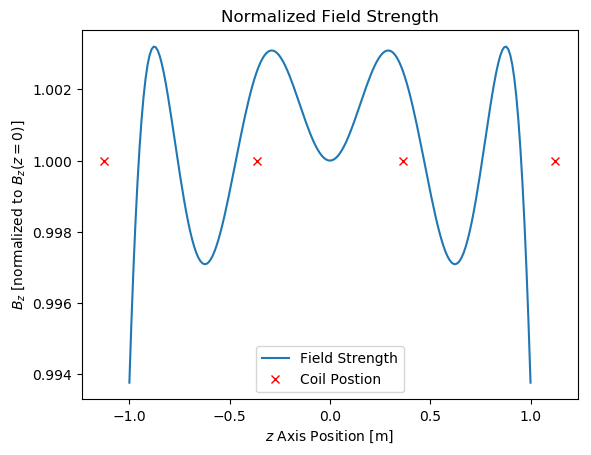

Residual = 0.002554270840195938
Coil positions = [-1.12405 -0.362844 0.362844 1.12405]
Currents = [1.14383 1.0 1.0 1.14383]
Radii = [0.762956 0.9 0.9 0.762956]


In [23]:
# Plot Results
plot(Z_1,B_Z1)
plot( D1', ones(size(D1))',"rx")  # plot location of coils as 'x'
title("Normalized Field Strength")
legend(["Field Strength", "Coil Postion"])
xlabel("\$z\$ Axis Position [m]")
ylabel("\$B_z\$ [normalized to \$B_z(z=0)\$]");

# Display Results
println("Residual = ", y1)       # total error
println("Coil positions = ", D1)
println("Currents = ", I1)
println("Radii = ", A1) 

The above plot shows the magnetic field intensity along the axis of the electromagnetic coils normalized by the field intensity at the center. The plot shows that using this method, 4 coils can achieve a variation of less than or equal to ~0.3% if the far edges are neglected, and an overall maximum variation of about 0.6%.

### Comparison to Lee-Whiting analytic solution


The Lee-Whiting solution was an analytic solution which minimzed variations in the field using 4 coils of the same radius, with relative spacings of {-0.4704d, -0.1216d, 0.1216d, 0.4704d}, where d is the coil diameter. Also, the optimal currents they found had relative magnitudes of {1, 4/9, 4/9, 1}. In this section we solve the problem with fixed coil radii and 4 coils to find optimal spacings and currents.

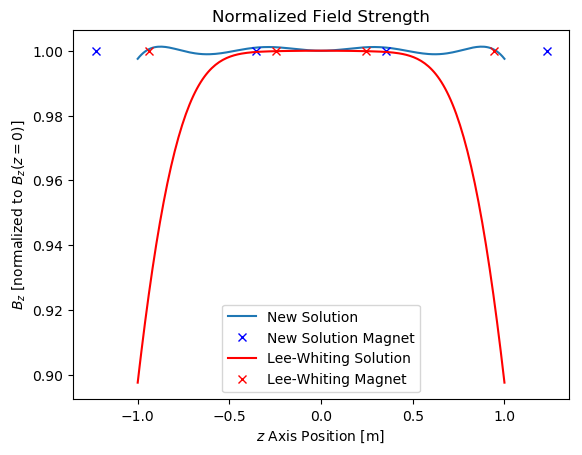

Residual = 0.00045238183188910287
Coil Spacing = [-1.22945 -0.355675 0.355675 1.22945]
Currents = [1.75443 1.0 1.0 1.75443]
Radii are 1 unit


In [24]:
using PyPlot

println("Residual = ", y2)           # total error
println("Coil Spacing = ", D2)
println("Currents = ", I2)
println("Radii are 1 unit")

plot(Z_2,B_Z2)
plot( D2', ones(size(D2))',"bx")  # plot location of coils as 'x'   
plot(Z_2,B_ZL,"r-")
plot( DL', ones(size(DL))',"rx")  # plot location of coils as 'x'
title("Normalized Field Strength")
xlabel("\$z\$ Axis Position [m]")
ylabel("\$B_z\$ [normalized to \$B_z(z=0)\$]")
legend(["New Solution", "New Solution Magnet", "Lee-Whiting Solution", "Lee-Whiting Magnet"]);

The above plot compares the on-axis optimization used in this report with the Lee-Whiting analytic solution from [1].  It appears that the Lee-Whiting solution is more uniform over a smaller length, but also that the coils are clustered closer to the center. Our solution is more uniform on average over the total length, but the increased spacing between coils in our solution causes some ripple along the length. Given a fixed radius, our solution displays a maximum variation that is much smaller than the maximum variation of the Lee-Whiting solution across the total sampling length. 

### Varying number of coils


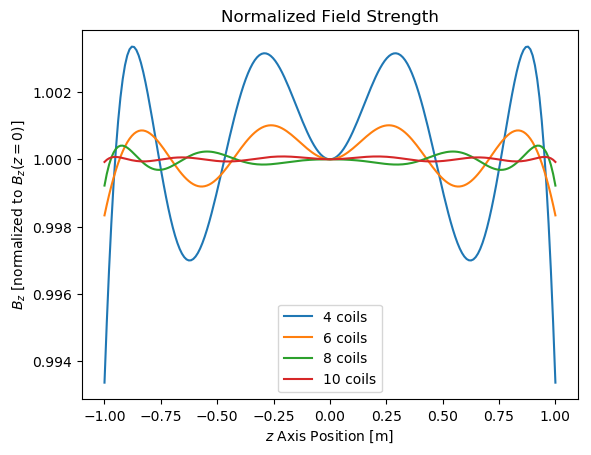

For 4 coils:
Residual = 0.002668733825128006
Coil Position = [-1.11953 -0.364856 0.364856 1.11953]
Currents = [1.10122 1.0 1.0 1.10122]
Coil Radii = [0.75 0.9 0.9 0.75]

For 6 coils:
Residual = 0.0003675546596798776
Coil Position = [-1.48827 -0.899384 -0.301587 0.301587 0.899384 1.48827]
Currents = [1.21175 0.962491 1.0 1.0 0.962491 1.21175]
Coil Radii = [0.75 0.840257 0.885367 0.885367 0.840257 0.75]

For 8 coils:
Residual = 6.255246949590099e-5
Coil Position = [-1.19542 -1.31286 -0.646752 -0.21104 0.21104 0.646752 1.31286 1.19542]
Currents = [1.03252 0.999216 0.93479 1.0 1.0 0.93479 0.999216 1.03252]
Coil Radii = [0.75 0.750236 0.751048 0.80949 0.80949 0.751048 0.750236 0.75]

For 10 coils:
Residual = 4.684639679550691e-6
Coil Position = [-1.3537 -1.35179 -0.782006 -0.447453 -0.214618 0.214618 0.447453 0.782006 1.35179 1.3537]
Currents = [1.04779 1.00614 0.950469 0.591981 1.0 1.0 0.591981 0.950469 1.00614 1.04779]
Coil Radii = [0.75 0.75 0.789857 0.9 0.9 0.9 0.9 0.789857 0.75 0.75]


In [15]:
plot(Z3,B_Z_4)
plot(Z3,B_Z_6)
plot(Z3,B_Z_8)
plot(Z3,B_Z_10)
                                           
title("Normalized Field Strength")
xlabel("\$z\$ Axis Position [m]")
ylabel("\$B_z\$ [normalized to \$B_z(z=0)\$]")
legend(["4 coils","6 coils", "8 coils","10 coils"])

# display results of each number of coils
println("For 4 coils:")
println("Residual = ", y_4)       # total error
println("Coil Position = ", D_4)
println("Currents = ", I_4)
println("Coil Radii = ", A_4) 
println("\nFor 6 coils:")
println("Residual = ", y_6)       # total error
println("Coil Position = ", D_6)
println("Currents = ", I_6)
println("Coil Radii = ", A_6) 
println("\nFor 8 coils:")
println("Residual = ", y_8)       # total error
println("Coil Position = ", D_8)
println("Currents = ", I_8)
println("Coil Radii = ", A_8)
println("\nFor 10 coils:")
println("Residual = ", y_10)       # total error
println("Coil Position = ", D_10)
println("Currents = ", I_10)
println("Coil Radii = ", A_10) 

The results show that an increased number of coils allows for a more uniform field. This trend makes physical sense, since a continually increasing number of coils would lead to a solenoid, which is known to have a maximally uniform magnetic field in its interior. Again, for some applications, a solenoid is impractical or prohibitively expensive and heavy.

### Elliptic integral approximation comparison

Now, we consider the volume sampling method using elliptic integrals. Since elliptic integrals are computationally expensive to evaluate, they are not suited for integration into an optimization routine due to their iterative nature. The first method is the Frisch and Fay approximation, which is a simple closed form expression for the integrals. The second approximation is by Byrd and Friedman, and is an 8th order polynomial. Below, we are evaluating the magnetic fields throughout a plane in a two-coil system using iterative elliptic integral evaluations. Then, we are plotting the percent differences between the iterative evaluation and both methods just described. 

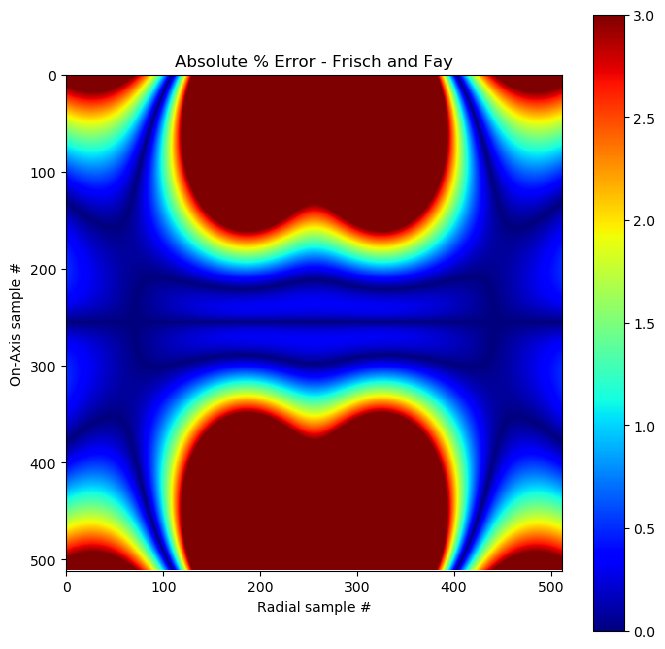

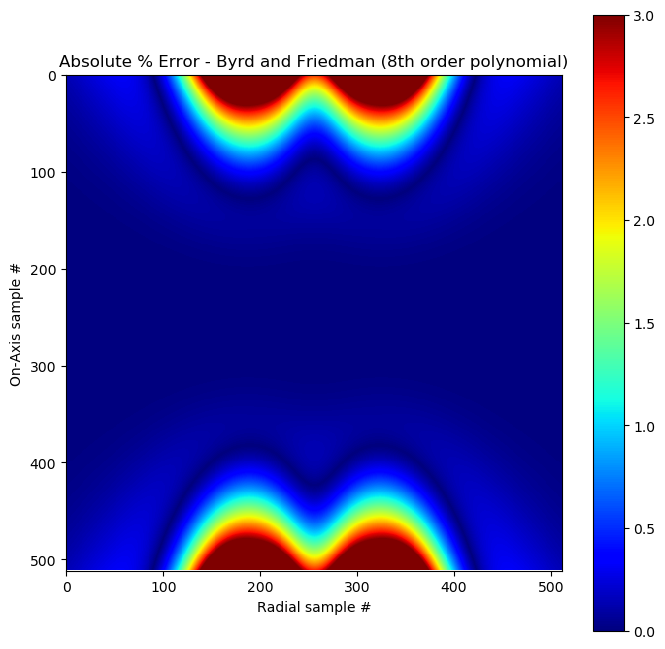

PyObject <matplotlib.text.Text object at 0x7f0e8e6f8510>

In [26]:
#plotting the absolute differences between the two competing elliptic integral approximations
using PyPlot
figure(figsize=(8,8))
imshow(methodError1,vmin=0,vmax=3 )
colorbar()
jet()
ylabel("On-Axis sample #")
xlabel("Radial sample #")
title("Absolute % Error - Frisch and Fay")

figure(figsize=(8,8))
imshow(methodError2,vmin=0,vmax=3 )
colorbar()
jet()
ylabel("On-Axis sample #")
xlabel("Radial sample #")
title("Absolute % Error - Byrd and Friedman (8th order polynomial)")

It's apparent that the 8th order polynomial approximation has a much greater accuracy than the simple closed form Frisch and Fay approximation. Even so, using the 8th order polynomial has error in the evaluation of the magnetic fields within the sampling volume. Therefore, we can't hope to obtain uniformity better than the error in the approximation. If a higher degree of uniformity is required, more terms in the polynomial approximation are required. From here on, we simply use the 8th order polynomial approximation for comparison. 

### Elliptic integral formulation - varying number of coils

First, to test the polynomial approximation against the previous results, we only sample along the axis. Then, we vary the number of coils used as 4, 6, 8, and 10.

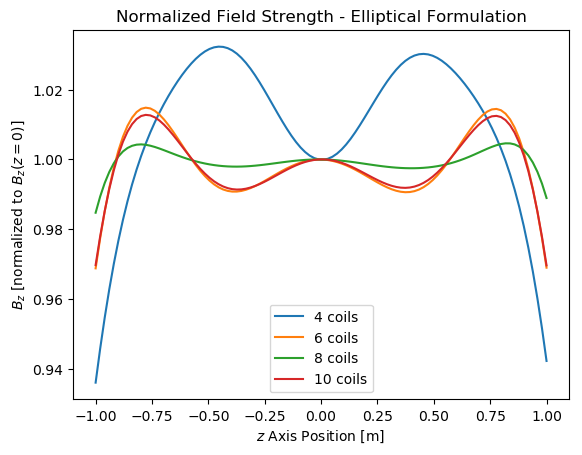

In [27]:
using PyPlot    
axialSampleL = 2; # length to maximize flatness over
Nz = 100;
z = linspace(-axialSampleL/2,axialSampleL/2,Nz);  #a vector of sampling points along the coil axes
for nn in 1:4
    plot(z,Bfield[nn,:]./Bfield[nn,50])
end

title("Normalized Field Strength - Elliptical Formulation")
xlabel("\$z\$ Axis Position [m]")
ylabel("\$B_z\$ [normalized to \$B_z(z=0)\$]")
legend(["4 coils","6 coils", "8 coils","10 coils"])

Looking at the axial method from before, the shapes of the magnetic field curves along the axis are similar. However, the maximum variation is about an order of magnitude greater using the polynomial approximation than it is from before. Also, the variation is on the order of the error in the polynomial approximation. The 10 coil curve seems to be worse than 8 coils, which indicates a local minimum because we know that physically more coils should produce more uniform fields along the axis.

### Axial vs. elliptic integral formulation

Finally, after solving for a 10 coil configuration using the volume sampling approach with polynomial elliptic integral approximations, we compare its optimal field uniformity with the purely axial sampling approach. Field uniformity is measured by taking the absolute percent difference between the field at the center of the sampling plane and at every other point in the plane.

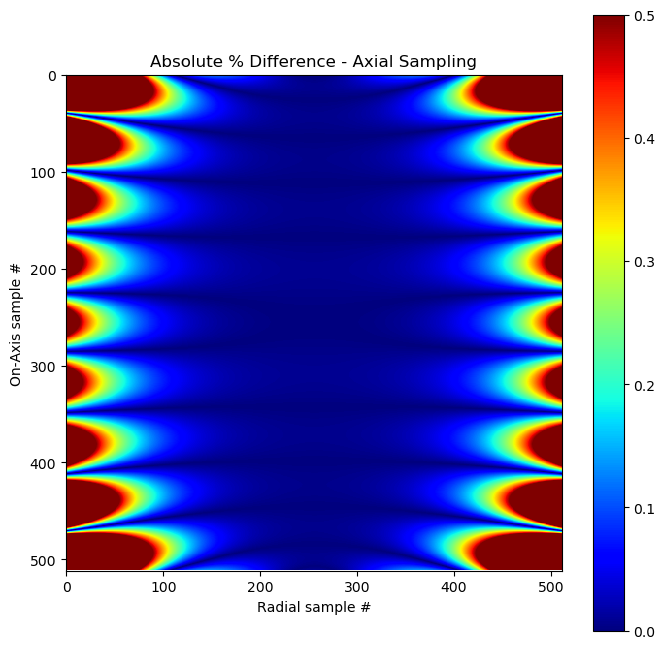

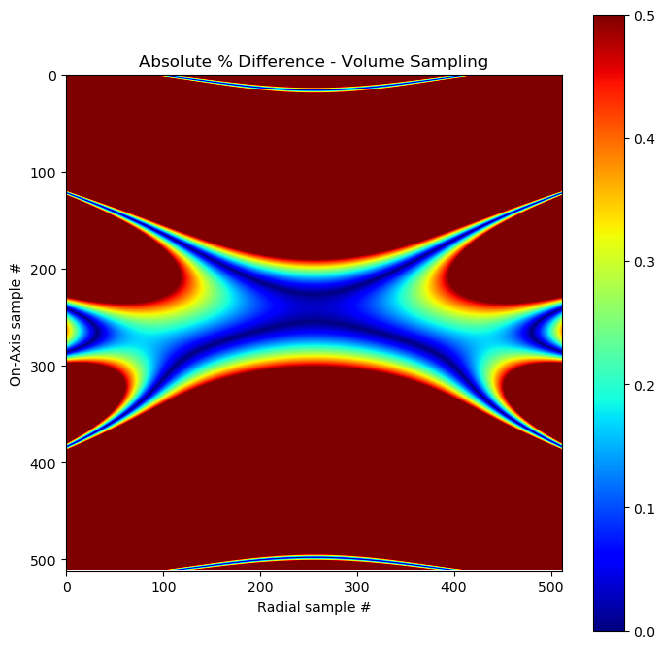

PyObject <matplotlib.text.Text object at 0x7f0e8e137150>

In [30]:
#plotting the normalized fields for the axial and planar optimizations formulations using the exac
using PyPlot
figure(figsize=(8,8))
imshow((abs((BzPl[256,256] - BzPl)./ BzPl[256,256]) .* 100)',vmin=0,vmax= 0.5 );
colorbar()
jet()
ylabel("On-Axis sample #")
xlabel("Radial sample #")
title("Absolute % Difference - Axial Sampling") 

figure(figsize=(8,8))
imshow((abs((BzAx[256,256] - BzAx)./ BzAx[256,256]) .* 100)',vmin=0,vmax=0.5 )
colorbar()
jet()
ylabel("On-Axis sample #")
xlabel("Radial sample #")
title("Absolute % Difference - Volume Sampling") 


Even though the volume sampling approach attempts to make the field as uniform as possible throughout the plane above, it's apparent that the axial sampling approach actually achieves a much more uniform field distribution. We suspect this to be due to the inherent error in the polynomial approximation, and the possibility for the volume sampling approach to converge to local minima (as seen previously in our comparison of the 8 and 10 coil solutions). 

## 5. Conclusion ##



Our results above indicate that extremely high degrees of field uiformity throughout the coil interior volume can be obtained through the axial sampling approach, while the polynomial approximation approach produced less uniform field distributions even though it takes longer to run.

The 8th order polynomial approximation that we employed had limited accuracy and was the reason our field uniformity was relatively poor in comparison to the axial sampling approach. We believe that higher order polynomial approximations to the elliptic integrals would improve our optimized field uniformity results. Therefore, as a future direction we would like to investigate using higher order polynomial approximations in the optimization formulation and its effect on field uniformity. Inherent in this investigation, we want to explore the tradeoff between the degree of the polynomial approximation and the computational burden. Since local minima seemed to pose a problem in the polynomial approach, we would like to evaluate the performace of global solvers in this problem. 


## 6. References ##


Kirschvink, J. (1992). Uniform magnetic fields and double-wrapped coil systems: Improved techniques for the design of bioelectromagnetic experiments. Bioelectromagnetics, 13(5), 401-411.